this is the first homeworks at this season of the lesson.
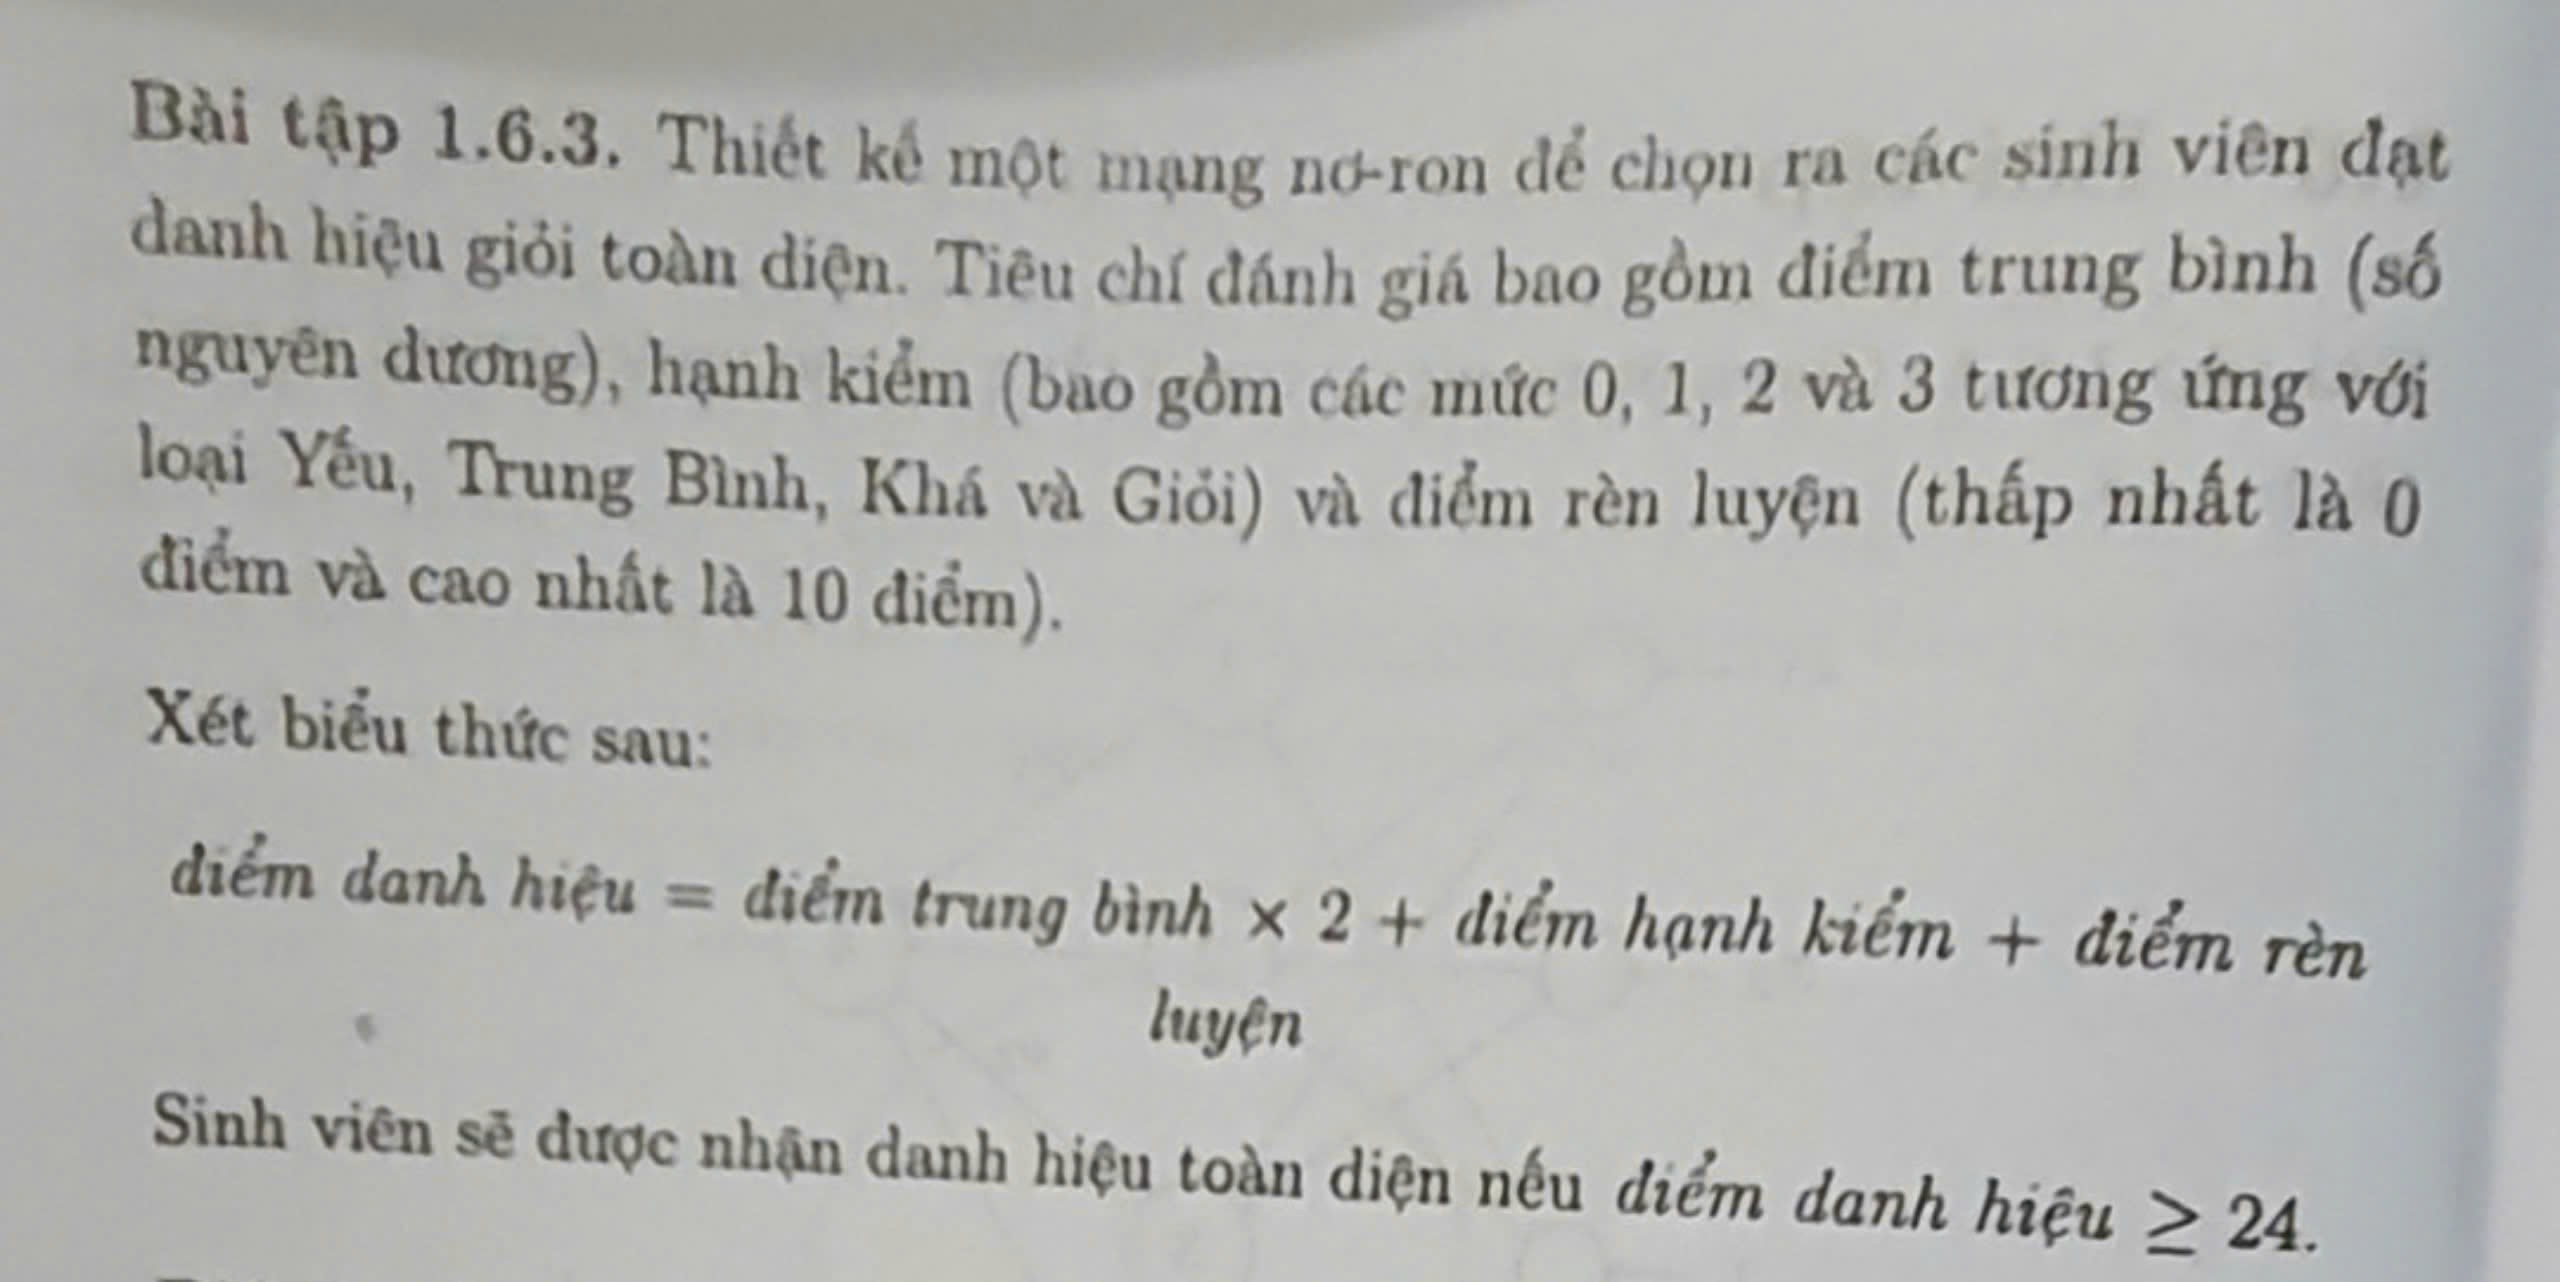
 in this task, we have to code a Neural networks to

In [1]:
#import thư viện cần thiết
import numpy as np
import sklearn.datasets as datasets
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preprocessing
import torch

import torch.optim as optim
import torch.nn as nn



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/hongviet/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/hongviet/Library/Python/3.12/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/hongviet/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.

In [2]:
# Điểm danh hiệu = điểm trung bình x 2 + điểm hạnh kiểm + điểm rèn luyện

# sinh viên sẽ đạt danh hiệu nếu điểm danh hiệu lớn hơn hoặc bằng 24

#điểm hạnh kiểm
behavior_point = {0, 1,2,3}
behavior = {"giỏi", "khá", "trung bình", "yếu"}
# điểm trung bình
average_point = {0, 1,2,3,4,5,6,7,8,9,10}
# điểm rèn luyện 
training_point = {0, 1,2,3,4,5,6,7,8,9,10}

#tính điểm danh hiệu dựa trên điểm trung bình, điểm hạnh kiểm và điểm rèn luyện 
def calculate_honor_point(average_point, behavior_point, training_point):
    honor_point = average_point * 2 + behavior_point + training_point
    return honor_point

In [3]:


# xây dựng mạng nơ ron để kiểm tra xem sinh viên có đạt danh hiệu hay là không
class NeurallNetwork(pl.LightningModule):
    # hàm khởi tạo số lớp ẩn là 4, số nơ ron trong mỗi lớp ẩn là 10
    def __init__(self):
        super(NeurallNetwork, self).__init__()
        self.fc1 = nn.Linear(5, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 = nn.Linear(10, 1)
        
    # hàm forward
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    
    # hàm tính loss
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.mse_loss(y_hat, y)
        return loss

    # hàm cập nhật trọng số
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.02)
    
    # hàm tạo dữ liệu
    def create_data(self):
        data = []
        for average_point in average_point:
            for behavior_point in behavior_point:
                for training_point in training_point:
                    honor_point = calculate_honor_point(average_point, behavior_point, training_point)
                    data.append([average_point, behavior_point, training_point, honor_point])
        return data
    
    # hàm chuẩn hóa dữ liệu
    def normalize_data(self, data):
         # phương thức chuẩn hóa này sẽ chia mỗi giá trị trong dữ liệu cho giá trị lớn nhất của cột đó
        data = np.array(data)
        data = data / data.max(axis=0) #lấy giá trị lớn nhất của mỗi cột
        return data
    
    # hàm chuyển dữ liệu thành tensor
    def to_tensor(self, data):
        data = torch.tensor(data, dtype=torch.float32) #float32 dùng để lưu trữ số thực dạng 32 bit theo như dạng tensro    
        return data
    
    # hàm tạo dữ liệu huấn luyện cho mô hình
    def train_dataloader(self):
        data = self.create_data()
        # chuẩn hóa dữ liệu
        data = self.normalize_data(data)
        # chuyển dữ liệu thành tensor
        data = self.to_tensor(data)
        x = data[:, :-1]
        y = data[:, -1:]
        # dữ liệu batch size = 16 với mục đích là để cập nhật trọng số mỗi 16 cặp phần tử dữ liệu sau khi nhóm lại xy
        return torch.utils.data.DataLoader(list(zip(x, y)), batch_size=16, shuffle=True)
    
    # hàm huấn luyện mô hình
    #việc chọn mô hình huẩn luyên dựa trên yêu cầu của bài toán
    #  làm sao để mô hình có thể dự đoán được điểm danh hiệu của sinh viên với hàm loss có giá trị nhỏ nhất
    def training_epoch_end(self, outputs):
        if self.current_epoch % 100 == 0:
            print(f"Epoch {self.current_epoch} is done!")

    # hàm kiểm tra mô hình
    def test_dataloader(self):
        data = self.create_data()
        data = self.normalize_data(data)
        data = self.to_tensor(data)
        x = data[:, :-1]
        y = data[:, -1:]
        return torch.utils.data.DataLoader(list(zip(x, y)), batch_size=16, shuffle=True)
    
    # hàm kiểm tra mô hình
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.mse_loss(y_hat, y)
        return loss
    
    # hàm kiểm tra mô hình
    def test_epoch_end(self, outputs):
        avg_loss = torch.tensor([x.item() for x in outputs]).mean()
        print(f"Avg loss: {avg_loss}")



In [ ]:
# Nguyên lý của việc thực hiện kiểm tra và lưu mô hình theo phương thức state
# 1. Tạo mô hình
# 2. Kiểm tra mô hình
# 3. Lưu mô hình
# 4. Tải mô hình
# 5. Kiểm tra mô hình
# và việc này  phải được thực hiện theo thứ tự từ 1 đến 5 với cái epoch lớn
# và chọn 1000 vì mô hình sẽ được cập nhật trọng số 1000 lần 
# từ đó mô hình sẽ học được nhiều hơn và dự đoán chính xác hơn

In [7]:


#hàm main để chạy chương trình

def main():
    #tính điểm danh hiệu
    # honor_point = calculate_honor_point(average_point, behavior_point, training_point)
    # print(honor_point)
    #tạo mô hình
    model = NeurallNetwork()
    #huấn luyện mô hình
    trainer = pl.Trainer(max_epochs=1000)
    trainer.fit(model)
    #kiểm tra mô hình
    trainer.test(model)
    #lưu mô hình
    torch.save(model.state_dict(), "model.pth")
    #load mô hình
    model.load_state_dict(torch.load("model.pth"))
    #dự đoán
    x = torch.tensor([[0.5, 0.5, 0.5]])
    y_hat = model(x)
    print(y_hat)
    #in ra kết quả dự đoán
    print(f"Predicted honor point: {y_hat.item()}")
    #in ra kết quả dự đoán
    if y_hat.item() >= 0.5:
        print("The student has honor point!")

In [8]:
#hàm main để chạy chương trình
if __name__ == "__main__":
    main()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


NotImplementedError: Support for `training_epoch_end` has been removed in v2.0.0. `NeurallNetwork` implements this method. You can use the `on_train_epoch_end` hook instead. To access outputs, save them in-memory as instance attributes. You can find migration examples in https://github.com/Lightning-AI/lightning/pull/16520.